# Make figure 5 of the paper
References:
- Plotting the plate boundaries: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GC000252

In [129]:
import fitz
import pandas as pd
import pygmt
from pyproj import Transformer
import tempfile

import numpy as np

## Figure 5(a)

In [130]:
method = 'reloc'
year = 'all_regions'
version = 'ver3'
# Load the catalogs 
matched_events_mycatalog2morton= pd.read_csv(f'../data/datasets_{year}/matched_events_with_morton_mycatalog_{method}_cog_morton_{version}_p_4_s_4_rms_2_5.csv')
unmatched_events_mycatalog2morton_and_anss= pd.read_csv(f'../data/datasets_{year}/new_events_{method}_cog_morton_{version}_p_4_s_4_rms_2_5.csv')
# new_events_filtered = pd.read_csv(f'../data/datasets_{year}/new_events_filtered_{year}.csv')
unmatched_events_morton2mycatalog= pd.read_csv(f'../data/datasets_{year}/missing_events_from_mycatalog_morton_{method}_cog_morton_{version}_p_4_s_4_rms_2_5.csv')
matched_events_morton2mycatalog= pd.read_csv(f'../data/datasets_{year}/matched_events_with_mycatalog_morton_{method}_cog_morton_{version}_p_4_s_4_rms_2_5.csv')
unmatched_events_anss2mycatalog = pd.read_csv(f'../data/datasets_{year}/missing_events_from_mycatalog_anss_{method}_cog_morton_{version}_p_4_s_4_rms_2_5.csv')
matched_events_mycatalog2anss= pd.read_csv(f'../data/datasets_{year}/matched_events_with_anss_mycatalog_{method}_cog_morton_{version}_p_4_s_4_rms_2_5.csv')
matched_events_anss2mycatalog= pd.read_csv(f'../data/datasets_{year}/matched_events_with_mycatalog_anss_{method}_cog_morton_{version}_p_4_s_4_rms_2_5.csv')

anss_events = pd.read_csv('../data/datasets_anss/anss_2010-15.csv')

plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 1684 in file PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5086 in file PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5113 in file PB2002_boundaries.dig
plot [WARNING]: Your data array row 17 contains NaNs - no resampling taken place!
/tmp/ipykernel_1122597/2750031533.py:26: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=unmatched_events_anss2mycatalog['longitude'], y=unmatched_events_anss2mycatalog['latitude'],
/tmp/ipykernel_1122597/2750031533.py:28: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=matched_events_mycatalog2morton['longitude'], y=matched_events_mycatalog2morton['latitude'],
/tmp/ipykernel_1122597/2750

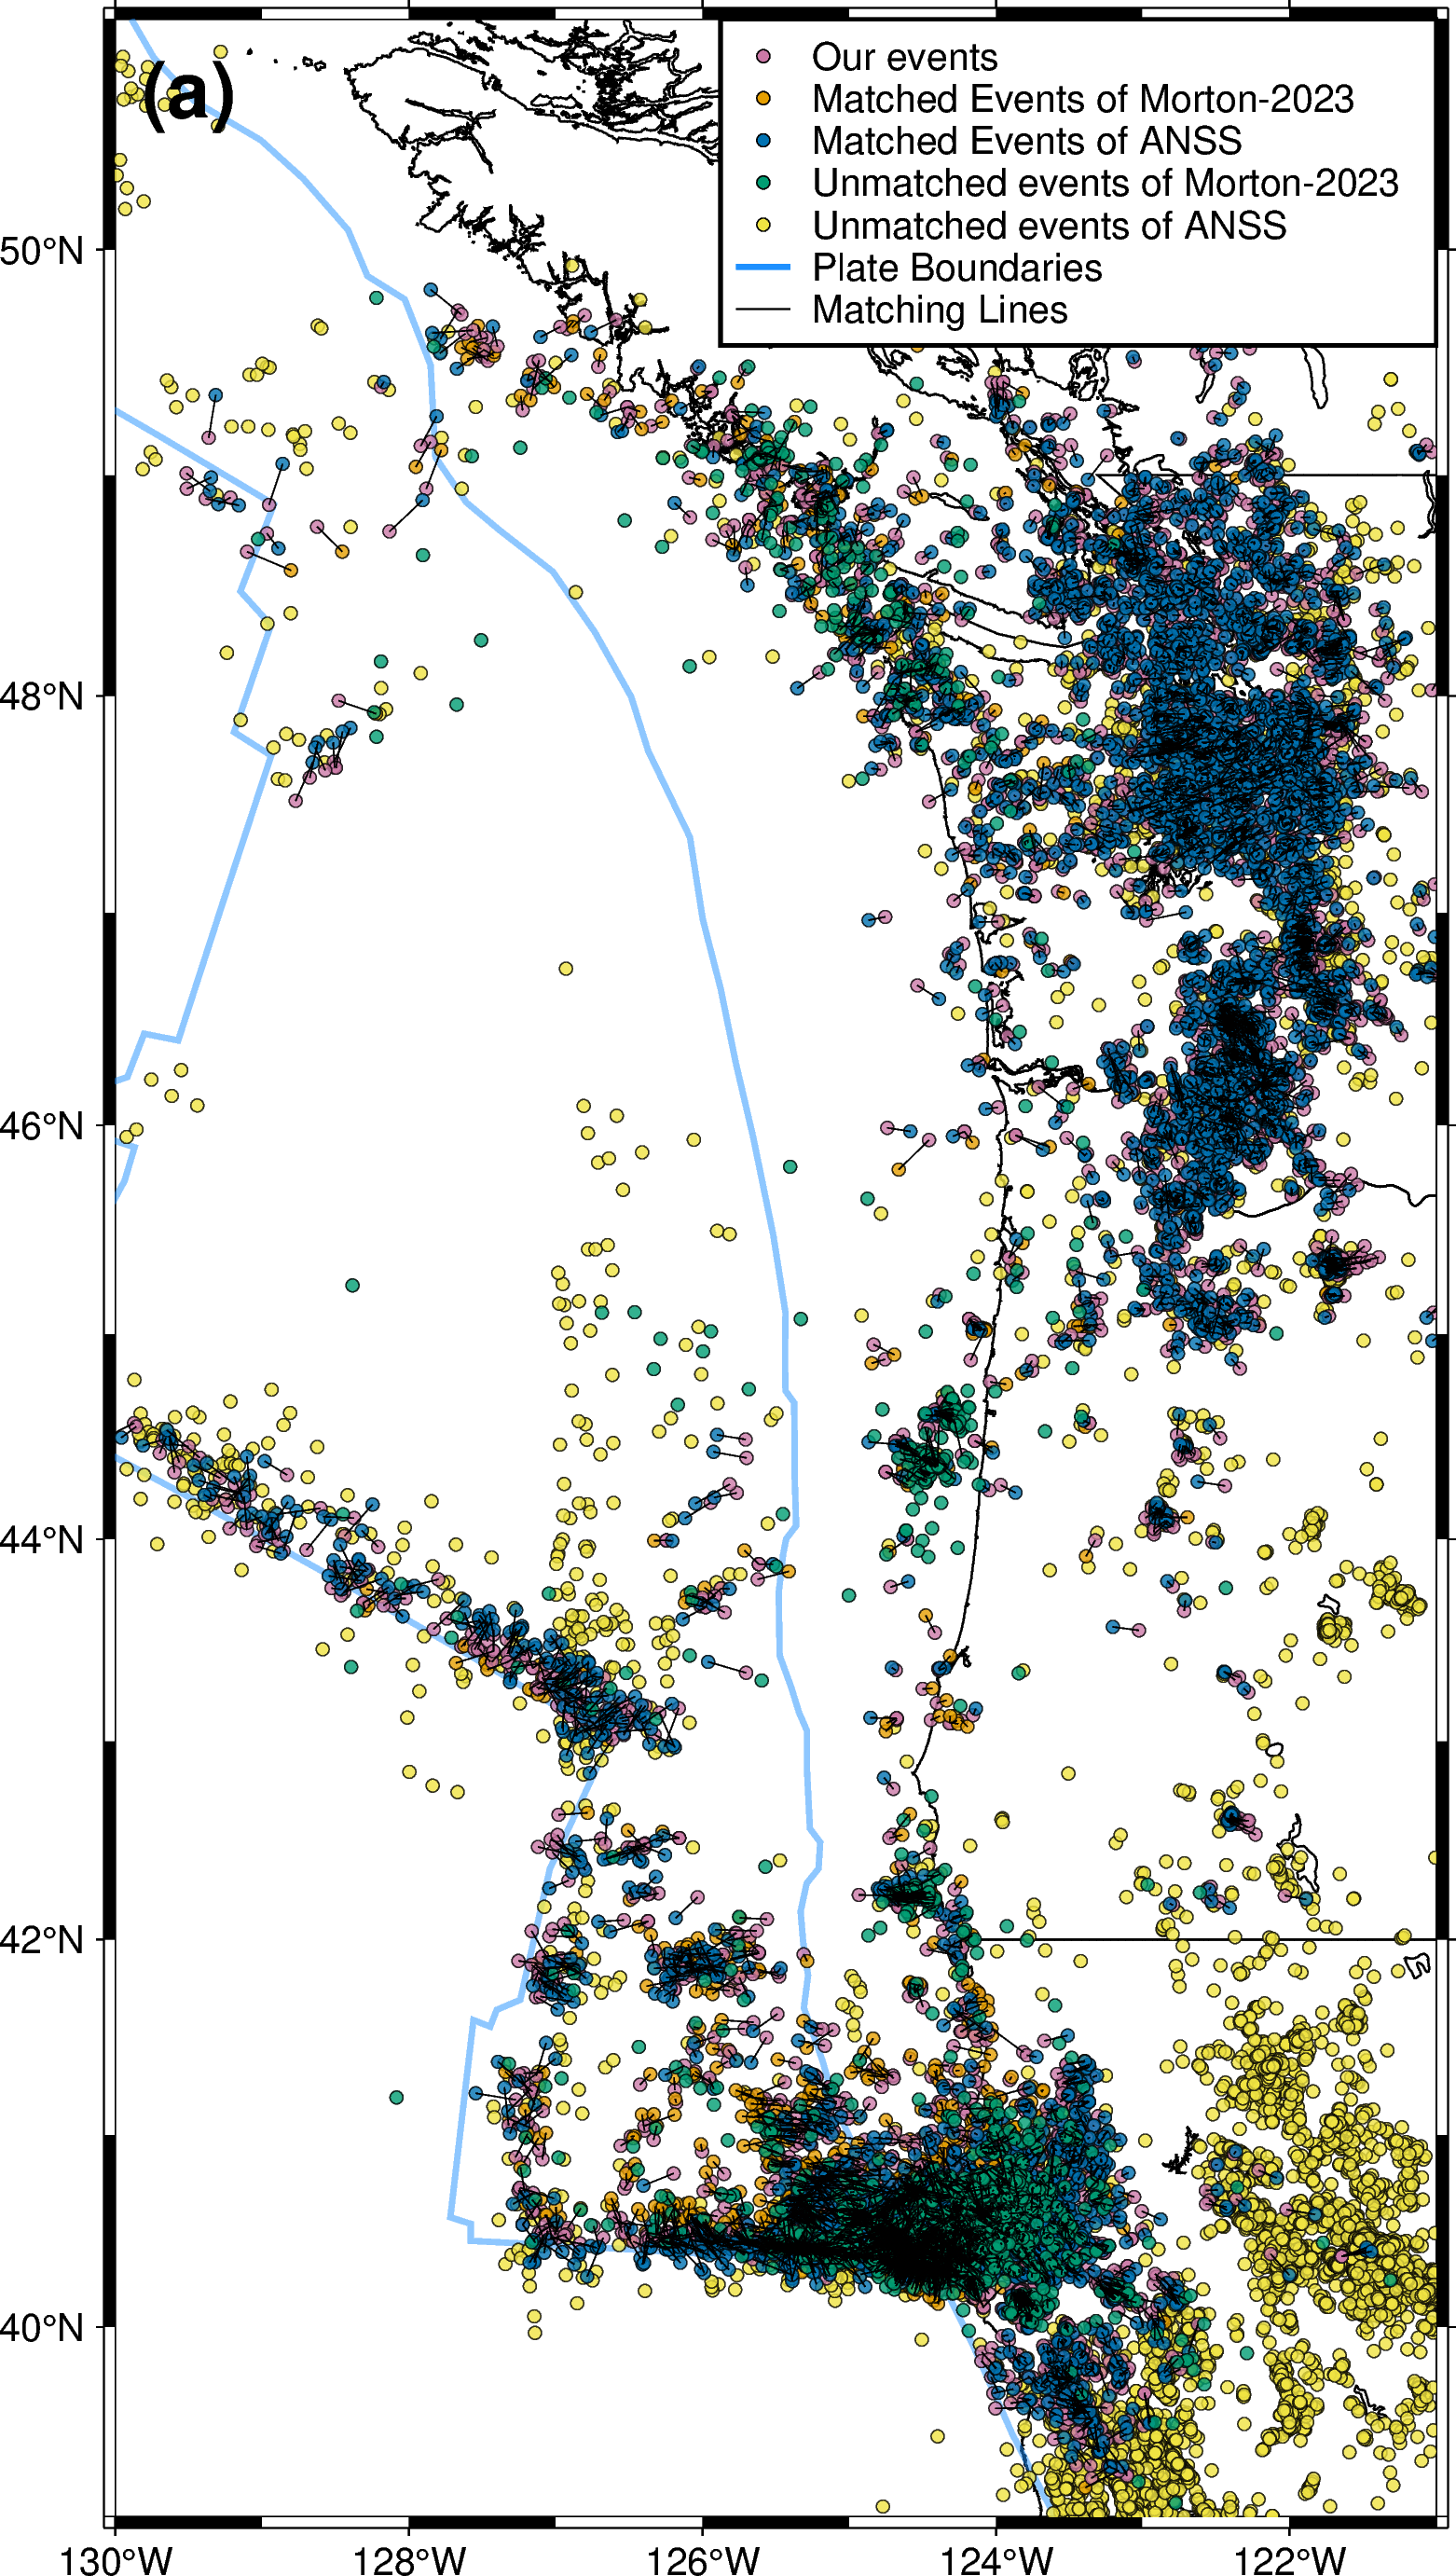

In [131]:
import pygmt
import tempfile

fig = pygmt.Figure()

# Define target region
min_lat = 39
max_lat = 51
min_lon = -130
max_lon = -121

# Define the region to plot
region = [min_lon, max_lon, min_lat, max_lat]
title = "(a)"

# Set up the base map
fig.basemap(region=region, projection="M12c", frame="af")

# Plot the coastlines and political boundaries
fig.coast(region=region, projection="M12c", shorelines="0.5p,black", borders=["1/0.5p,black", "2/0.5p,black"], resolution="f")

# Add plate boundaries 
fig.plot(data="PB2002_boundaries.dig", pen="1.5p,dodgerblue1", transparency=50)

# Plot the matching events
fig.plot(x=unmatched_events_anss2mycatalog['longitude'], y=unmatched_events_anss2mycatalog['latitude'],  
         style="c0.12c", color='#F0E442', pen="black",  transparency=20)
fig.plot(x=matched_events_mycatalog2morton['longitude'], y=matched_events_mycatalog2morton['latitude'],  
         style="c0.12c", color='#CC79A7', pen="black",  transparency=20)
fig.plot(x=matched_events_morton2mycatalog['LON'], y=matched_events_morton2mycatalog['LAT'],  
         style="c0.12c", color='#E69F00', pen="black",  transparency=20)
fig.plot(x=matched_events_mycatalog2anss['longitude'], y=matched_events_mycatalog2anss["latitude"],  
         style="c0.12c", color='#CC79A7', pen="black",  transparency=20)
fig.plot(x=matched_events_anss2mycatalog['longitude'], y=matched_events_anss2mycatalog['latitude'],  
         style="c0.12c", color='#0072B2', pen="black",  transparency=20)
fig.plot(x=unmatched_events_morton2mycatalog['LON'], y=unmatched_events_morton2mycatalog["LAT"],  
         style="c0.12c", color='#009E73', pen="black",  transparency=20)
# # Plot lines between matched events
for i in range(len(matched_events_mycatalog2morton)):
    fig.plot(
        x=[matched_events_morton2mycatalog.iloc[i]['LON'], matched_events_mycatalog2morton.iloc[i]['longitude']],
        y=[matched_events_morton2mycatalog.iloc[i]['LAT'], matched_events_mycatalog2morton.iloc[i]['latitude']],
        pen="0.3p,black"
    )
    
for i in range(len(matched_events_mycatalog2anss)):
    fig.plot(
        x=[matched_events_anss2mycatalog.iloc[i]['longitude'], matched_events_mycatalog2anss.iloc[i]['longitude']],
        y=[matched_events_anss2mycatalog.iloc[i]['latitude'], matched_events_mycatalog2anss.iloc[i]['latitude']],
        pen="0.3p,black"
    )
    
fig.text(x=-129.5, y=50.7, text=title, font="20p,Helvetica-Bold,black", no_clip=True)

# Plot dummy data for the legend
fig.plot(
    x=[-129.5+120], y=[50.7-30],
    style="c0.12c", color="#CC79A7", pen="black", transparency=20,
    label="Our events"
)
fig.plot(
    x=[-129.5+120], y=[50.7-30],
    style="c0.12c", color="#E69F00", pen="black", transparency=20,
    label="Matched Events of Morton-2023"
)
fig.plot(
    x=[-129.5+120], y=[50.7-30],
    style="c0.12c", color="#0072B2", pen="black", transparency=20,
    label="Matched Events of ANSS"
)
fig.plot(
    x=[-129.5+120], y=[50.7-30],
    style="c0.12c", color="#009E73", pen="black", transparency=20,
    label="Unmatched events of Morton-2023"
)
fig.plot(
    x=[-129.5+120], y=[50.7-30],
    style="c0.12c", color="#F0E442", pen="black", transparency=20,
    label="Unmatched events of ANSS"
)
fig.plot(
        x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
        y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
        pen="1.5p,dodgerblue1",label='Plate Boundaries'
    )
fig.plot(
        x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
        y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
        pen="0.3p,black",label='Matching Lines'
    )



# Add a legend for the pick scale to the plot
fig.legend(position="JTR+w6.5+jTR", box='+gwhite+p1p')

# Save the figure
fig.savefig(f"../data/datasets_{year}/matched_events_{year}_reloc_cog_morton_ver3_p_4_s_4_rms_2_5_no_relief.pdf")

# Display the figure
fig.show()


## Figure 5(b)

In [132]:
df = pd.read_csv('../data/datasets_all_regions/origin_2010_2015_reloc_cog_morton_ver3.csv',index_col=0)
df


lat        lon   depth          time   orid  nass  p_picks  \
0      47.22533 -122.16895  56.111  1.262305e+09      0     7        2   
1      48.19518 -121.77276   3.820  1.262305e+09      1    55       25   
2      47.86208 -122.09903  17.799  1.262330e+09      2    28       10   
3      47.96435 -122.91906  21.286  1.262336e+09      3    20       10   
4      45.87262 -122.19180   9.822  1.262362e+09      4    39       20   
...         ...        ...     ...           ...    ...   ...      ...   
63882  40.59439 -124.42438  19.741  1.435097e+09  63882    23        9   
63883  40.54636 -127.10076  26.165  1.435100e+09  63883    12        1   
63884  49.74167 -124.58578   5.274  1.435101e+09  63884    13        7   
63885  40.64363 -125.36531   1.891  1.435101e+09  63885     8        3   
63886  43.37085 -127.35251   5.915  1.435101e+09  63886     9        4   

       s_picks    rms  nsphz         gap algorithm  id_Morton      dist  \
0            5  1.081    5.0  235.831208     genie          0  0.753784   
1           30  0.985   30.0  201.698107     genie          0  1.333054   
2           18  0.784   18.0  181.023074     genie          0  0.957326   
3           10  0.465   10.0  150.528010     genie          0  0.684951   
4           19  0.657   19.0  237.324295     genie          0  1.627692   
...        ...    ...    ...         ...       ...        ...       ...   
63882       14  1.015   14.0   73.959960     genie       4408  0.112501   
63883       11  0.744   11.0  223.080984     genie       4408  2.139193   
63884        6  0.894    6.0  197.904075     genie       4408  9.188393   
63885        5  0.982    5.0  145.748415     genie       4408  0.824720   
63886        5  0.447    5.0  247.683119     genie       4408  3.622500   

                 dt     NonDimDist  
0      4.933721e+07  411143.414481  
1      4.933712e+07  411142.646872  
2      4.931184e+07  410932.027590  
3      4.930621e+07  410885.088574  
4      4.927976e+07  410664.693011  
...             ...            ...  
63882  7.919735e+03      65.997794  
63883  9.995899e+03      83.299204  
63884  1.107364e+04      92.281049  
63885  1.158579e+04      96.548245  
63886  1.194284e+04      99.523782  

[63887 rows x 16 columns]

In [133]:
_df = df[(df.rms < 2.5) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('nass', ascending=True)


plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 1684 in file PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5086 in file PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5113 in file PB2002_boundaries.dig
plot [WARNING]: Your data array row 17 contains NaNs - no resampling taken place!


/tmp/ipykernel_1122597/3493870561.py:33: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(
/tmp/ipykernel_1122597/3493870561.py:43: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=[-110], y=[48], style="c0.12c", color="white", label="Catalog Event", pen="0.2p,black")


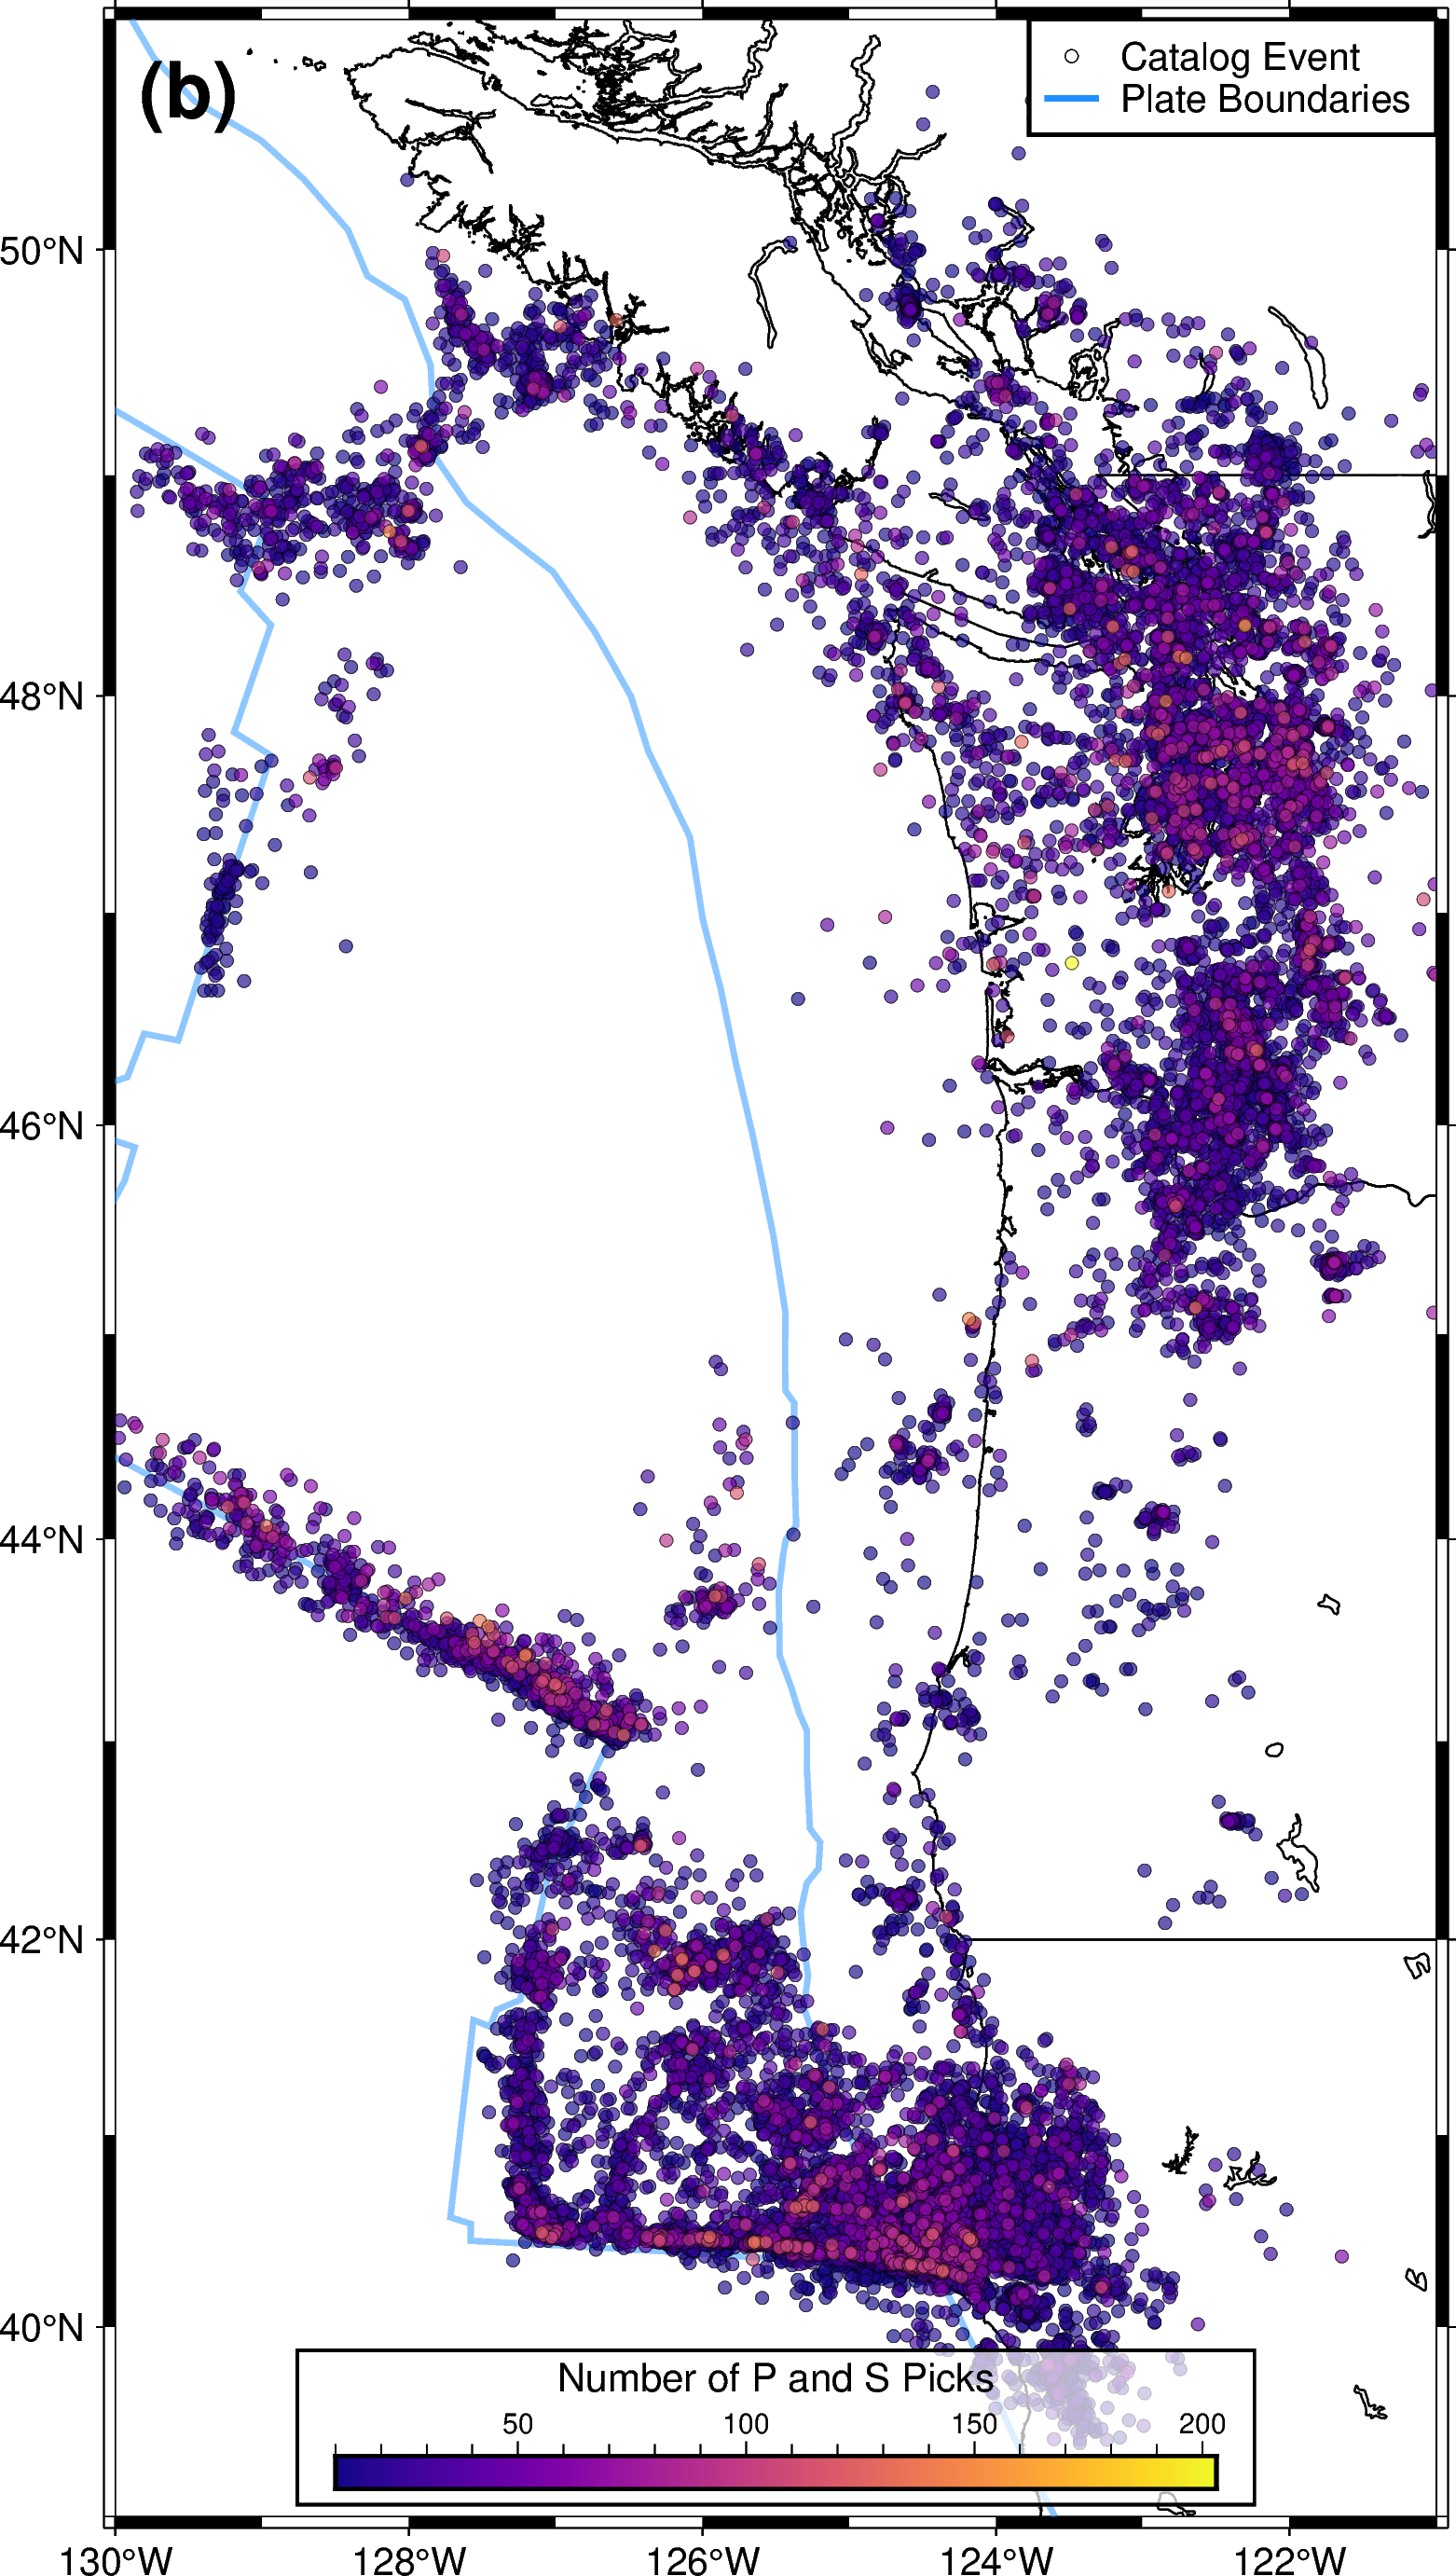

In [134]:


# Initialize the figure
fig = pygmt.Figure()

# Define target region
min_lat = 39
max_lat = 51
min_lon = -130
max_lon = -121

# Define the region to plot
region = [min_lon, max_lon, min_lat, max_lat]
title = "(b)"


# Load grid data
# Set up the base map
fig.basemap(region=region, projection="M12c", frame="af")

# Plot the coastlines and political boundaries
fig.coast(region=region, projection="M12c", shorelines="0.5p,black", borders=["1/0.5p,black", "2/0.5p,black"], resolution="f")

# Add plate boundaries 
fig.plot(data="PB2002_boundaries.dig", pen="1.5p,dodgerblue1", transparency=50)

# Apply logarithmic scale for color mapping
# Apply log10 transformation to nass values and set color palette
nass_log_min = _df['nass'].min()  # Add 1 to avoid log(0) error
nass_log_max = _df['nass'].max()
pygmt.makecpt(cmap="plasma", series=[nass_log_min, nass_log_max])
title = "(b)"

# Plot the stations with the color map applied to the logarithm of "nass"
fig.plot(
    x=_df["lon"],
    y=_df["lat"],
    style="c0.12c",
    color=_df["nass"],  # Apply log transformation for color mapping
    cmap=True,
    pen="0.1p,black",
    transparency=35
)
# Plot a dummy objects for the legend
fig.plot(x=[-110], y=[48], style="c0.12c", color="white", label="Catalog Event", pen="0.2p,black")

fig.plot(
        x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
        y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
        pen="1.5p,dodgerblue1",label='Plate Boundaries'
    )

fig.text(
    x=-129.5, y=50.7, text=title,
    font="20p,Helvetica-Bold,black",
    no_clip=True    # This prevents the text from being clipped
)

# Add title text
fig.colorbar(
    position="jBC+o0.0c/0.25c+h+w8c/0.3c+ml",
    box="+gwhite@30+p0.8p,black",
    frame=["x+lNumber of P and S Picks"],
)

# Add the legend to the plot
fig.legend(position="JTR+w3.7+jTR", box='+gwhite+p1p')
# Save the figure
fig.savefig("../data/datasets_all_regions/all_catalog_events_2010_2015_ver3_nass_no_relief.pdf")

# Display the figure
fig.show()


## Combine two figures

In [135]:

# Load the two existing PyGMT PDFs
doc1 = fitz.open(f"../data/datasets_{year}/matched_events_{year}_reloc_cog_morton_ver3_p_4_s_4_rms_2_5_no_relief.pdf")
doc2 = fitz.open(f"../data/datasets_{year}/all_catalog_events_2010_2015_ver3_nass_no_relief.pdf")

# Create a new empty PDF to hold the combined plot
combined = fitz.open()

# Get dimensions of both plots
rect1 = doc1[0].rect
rect2 = doc2[0].rect

# Determine combined width and max height
combined_width = rect1.width + rect2.width
combined_height = max(rect1.height, rect2.height)

# Create a new blank page with combined size
page = combined.new_page(width=combined_width, height=combined_height)

# Paste the first plot on the left
page.show_pdf_page(rect1, doc1, 0)

# Paste the second plot to the right of the first
right_rect = fitz.Rect(rect1.width, 0, combined_width, rect2.height)
page.show_pdf_page(right_rect, doc2, 0)

# Save the combined PDF
combined.save("../data/datasets_all_regions/fig5_no_relief.pdf")

In [136]:
# Load the PDF
doc = fitz.open("../data/datasets_all_regions/fig5_no_relief.pdf")

# Set zoom factor or resolution
zoom = 4  # 4x means ~300+ DPI depending on original figure size
mat = fitz.Matrix(zoom, zoom)

# Render the first page to a high-res pixmap
pix = doc[0].get_pixmap(matrix=mat, alpha=False)

# Save to PNG
pix.save("../data/datasets_all_regions/fig5_no_relief.png")